# Q2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

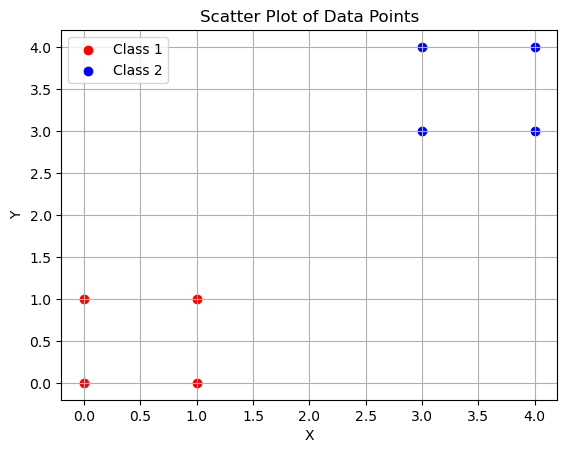

In [2]:
# Define the data points
data = [(0, 0),(1, 0), (0, 1), (1, 1), (3, 3), (4, 3), (3, 4),(4, 4)]

# Divide the data into two classes
class_1 = []
class_2 = []

for point in data:
    if point[0] < 3 and point[1] < 3:
        class_1.append(point)
    else:
        class_2.append(point)

# Plot the data points
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='red', label='Class 1')
plt.scatter([point[0] for point in class_2], [point[1] for point in class_2], color='blue', label='Class 2')

# Chart settings
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Data Points')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# KNN(K=1)

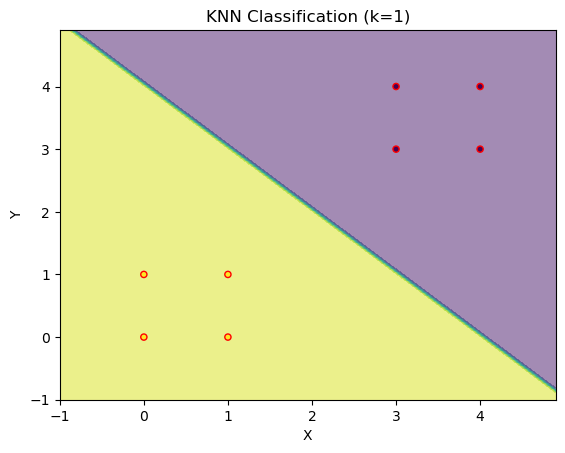

In [22]:
# Define the data points
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1],[3, 3], [4, 3], [3, 4], [4, 4]])
# Define the labels for each point (assuming first four points belong to one class, last four to another)
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Create KNN classifier with k=1 (nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the classifier to the data
knn.fit(X, y)

# Plot the decision boundary
h=0.1 #step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='r')
plt.title("KNN Classification (k=1)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# perceptron

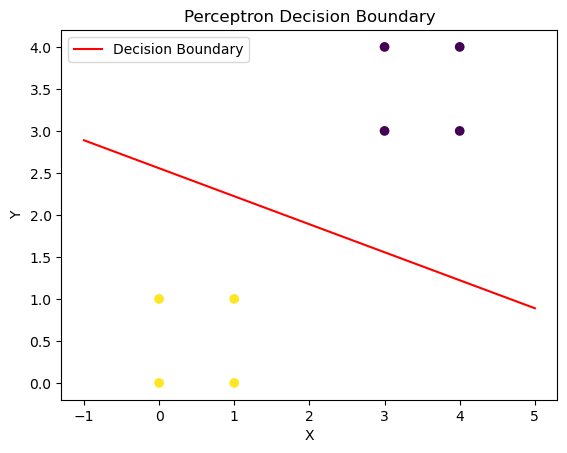

In [23]:
# Define the data points
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1],[3, 3], [4, 3], [3, 4], [4, 4]])
# Define the labels for each point (assuming first four points belong to one class, last four to another)
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Initialize weights and bias
weights = [1,-1]
bias = 1

# Define perceptron training function
def perceptron_train(X, y, weights, bias, learning_rate=0.4, epochs=1000):
    for _ in range(epochs):
        for i in range(len(X)):
            # Compute the predicted class
            predicted = np.sign((np.dot(X[i], weights)) - bias)
            
            # Update weights and bias if misclassified
            if (y[i] * predicted) <= 0:
                weights += 2*learning_rate * y[i] * X[i]
                bias += -2*learning_rate * y[i]
    return weights, bias

# Train the perceptron model
weights, bias = perceptron_train(X, y, weights, bias)

# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
x_values = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y_values = (-weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.title("Perceptron Decision Boundary")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
